# Soluções de otimização através do uso de derivadas assistido por recurso computacional.
## Uso da linguagem Python e suas bibliotecas especializadas(Sympy e Matplotlib, principalmente).

Sequencia visual dos passos para abordagem de problemas através das derivadas. Os programas farão o trabalho da geração dos gráficos.

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams

from sympy import *
a, b, c, l, x, y = symbols("a b c l x y")
init_printing(use_unicode=True)

from math import sqrt
from optm import *
from mpl_toolkits.mplot3d import Axes3D as a3
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

rcParams['figure.figsize'] = (8.0, 6.0)


In [22]:
lado = 16

<IPython.core.display.Javascript object>


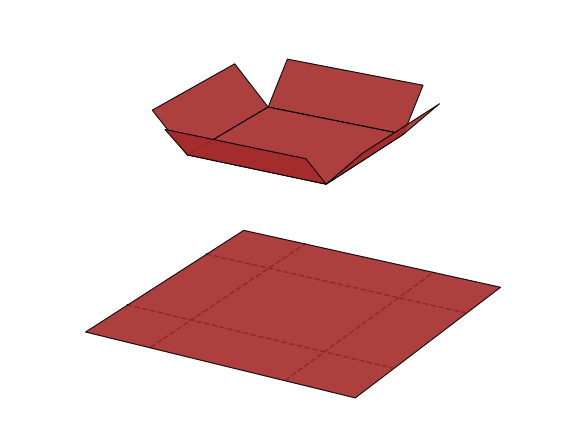

In [23]:
%matplotlib notebook
plot_a_box(lado,lado/4,lado)

 ###    A variação do volume do cubo em função do lado do quadrado retirado do quadrado base é expressa pela fórmula:

#  $f(x): 4x^3 - 4lx^2 + xl^2 $
sendo x o lado do quadrado destacado e $l$ o lado do quadrado base.

In [24]:
fVolume = 4*x**3-4*l*x**2+x*l**2

### E a sua derivada é:

# $ f´(x): 12x^2 - 8lx + l^2 $

### Pra encontrarmos os pontos críticos, basta saber para quais valores de $x$ a funcão acima retorna $0$( zero ).
#### Como se trata de uma função quadrática, convenientemente, usar-se-á formula de Báskara.

In [25]:
#O comando diff deriva a função com a variável passada no parametro
fVolume_linha = diff(fVolume,x)

In [26]:
ptosCriticos=(bhaskara(12, -8*lado, lado**2))
ptosCriticos

### Porém esses valore apenas indicam as abscissas dos pontos críticos. Para termos as ordenadas, basta fazermos $f(x)$ (a funçao do volume) para cada um desses pontos.

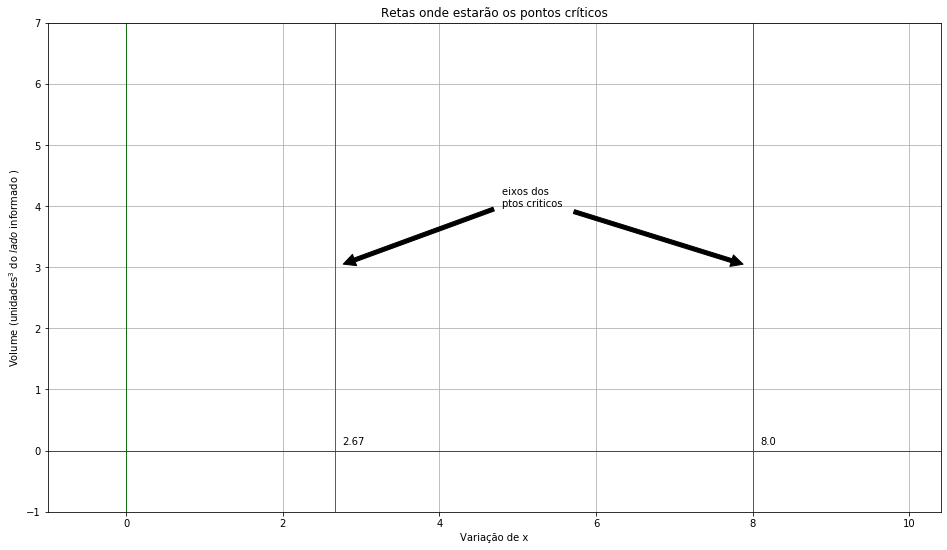

In [39]:
%matplotlib inline
rcParams['figure.figsize'] = (16.0, 9.0)

fig, ax = plt.subplots()

plt.title("Retas onde estarão os pontos críticos")
plt.xlabel("Variação de x")
plt.ylabel("Volume (unidades$^3$ do $lado$ informado )")



plt.grid(True)

plt.axvline(x=ptosCriticos[0], lw=0.9, c="red")
plt.axvline(x=ptosCriticos[1], lw=0.9, c="red")
plt.axhline(y=0, lw=0.9, c="darkgreen")
plt.axvline(x=0, lw=0.9, c="darkgreen")

plt.text(ptosCriticos[0]+0.1, 0.1, (  round(ptosCriticos[0], 2)), ha="left")
plt.text(ptosCriticos[1]+0.1, 0.1, (  round(ptosCriticos[1], 2)))
plt.xlim(-1,ptosCriticos[0]*1.3)

plt.annotate('eixos dos\nptos criticos', xy=(ptosCriticos[0], 3), xytext=(lado*0.30, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('', xy=(ptosCriticos[1], 3), xytext=(lado*0.30, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-1,7)
plt.plot()
plt.show()

### Com a derivada segunda de x´ e x´´ obtidos dos *zeros* da derivada primeira conseguimos determinar se estes pontos são de máxima(se $f''(x_c) < 0$) ou de mínima(se $f''(x_c)>0$).

# $ f´´(x_c):24x - 8l $

In [28]:
if diff(fVolume_linha, x).subs(l, lado).subs(x, ptosCriticos[0]) < 0:
    maxVolume_x = ptosCriticos[0]
    minVolume_x = ptosCriticos[1]
else:
    maxVolume_x = ptosCriticos[1]
    minVolume_x = ptosCriticos[0]

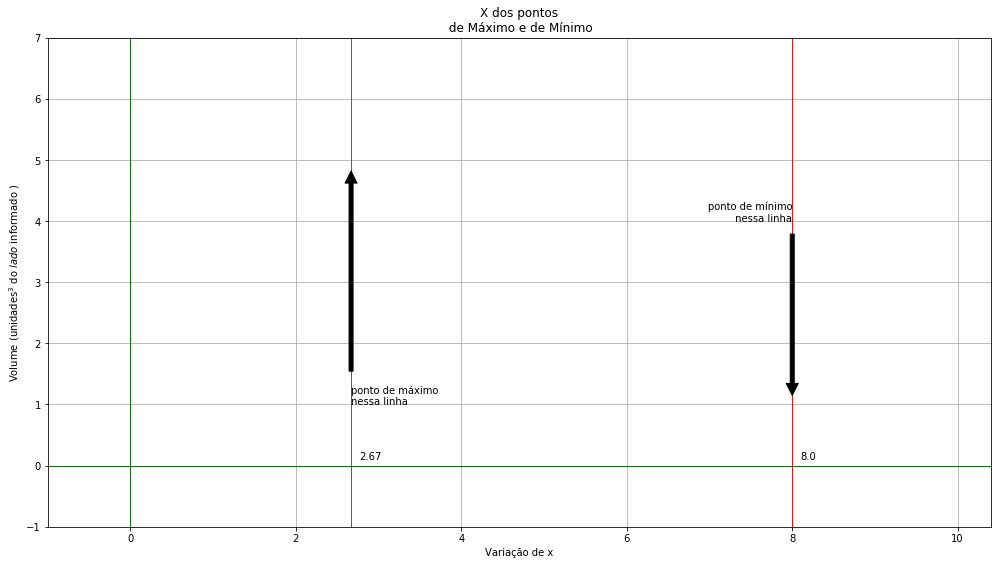

In [29]:
%matplotlib inline
rcParams['figure.figsize'] = (16.9, 9.0)

fig, ax = plt.subplots()

plt.title("X dos pontos\n de Máximo e de Mínimo")
plt.xlabel("Variação de x")
plt.ylabel("Volume (unidades$^3$ do $lado$ informado )")



plt.grid(True)

plt.axvline(x=ptosCriticos[0], lw=0.9, c="red")
plt.axvline(x=ptosCriticos[1], lw=0.9, c="red")
plt.axhline(y=0, lw=0.9, c="darkgreen")
plt.axvline(x=0, lw=0.9, c="darkgreen")

plt.text(ptosCriticos[0]+0.1, 0.1, (  round(ptosCriticos[0], 2)))
plt.text(ptosCriticos[1]+0.1, 0.1, (  round(ptosCriticos[1], 2)))
plt.xlim(-1,ptosCriticos[0]*1.3)

plt.annotate('ponto de máximo \nnessa linha', xy=(maxVolume_x, 5), xytext=(maxVolume_x, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('ponto de mínimo\n nessa linha', xy=(minVolume_x, 1), xytext=(minVolume_x, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment="right"
            )

plt.ylim(-1,7)
plt.plot()
plt.show()

### Substituindo-se x por maxVolume_x temos o volume máximo:

In [30]:
maximoVolume = fVolume.subs(l,lado).subs(x, maxVolume_x)

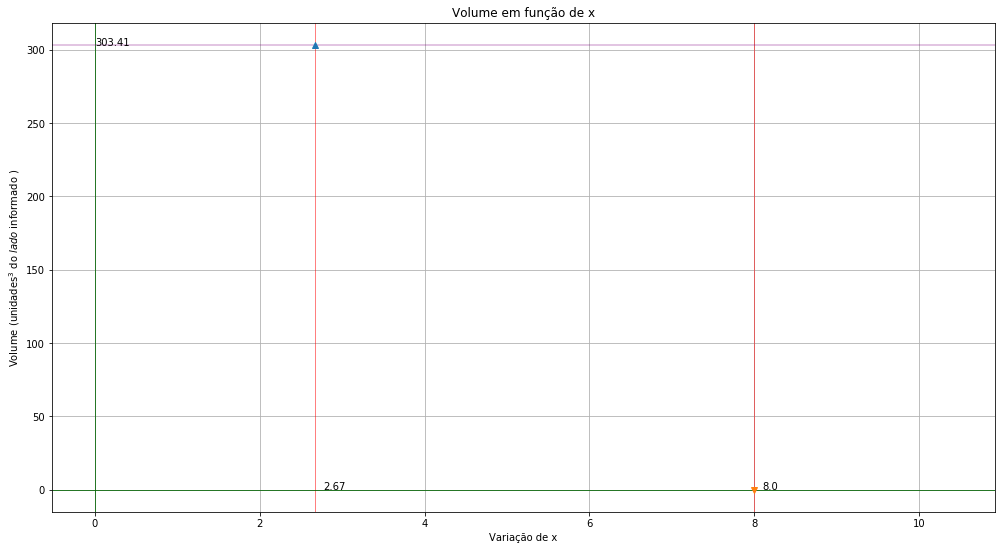

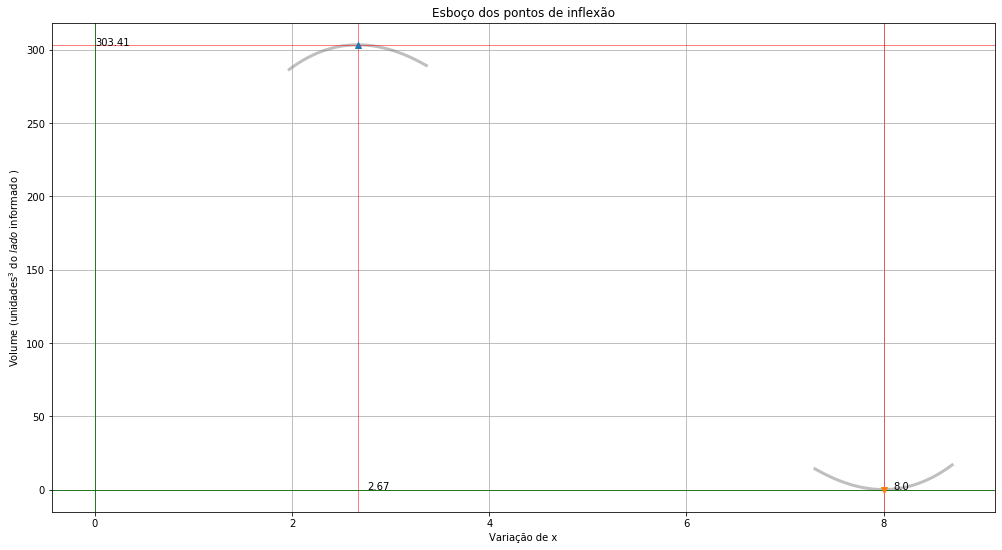

In [31]:
%matplotlib inline
rcParams['figure.figsize'] = (16.9, 9.0)

fig, ax = plt.subplots()
plt.title("Volume em função de x")
plt.xlabel("Variação de x")
plt.ylabel("Volume (unidades$^3$ do $lado$ informado )")

plt.grid(True)
plt.axvline(x=maxVolume_x, lw=0.5, c="red")
plt.axvline(minVolume_x, lw=0.5, c="red")
plt.axhline(y=0, lw=0.8, c="darkgreen")
plt.axvline(x=0, lw=0.8, c="darkgreen")

plt.axhline( round(fVolume.subs(l,lado).subs(x,maxVolume_x) ), c='purple', alpha=0.3)
plt.text(0, round(fVolume.subs(l,lado).subs(x,maxVolume_x) ), round(fVolume.subs(l,lado).subs(x,maxVolume_x), 2))

plt.text(ptosCriticos[0]+0.1, 0.1, (  round(ptosCriticos[0], 2)))
plt.text(ptosCriticos[1]+0.1, 0.1, (  round(ptosCriticos[1], 2)))


plt.plot(maxVolume_x, fVolume.subs(l,lado).subs(x,maxVolume_x), marker="^")
plt.plot(minVolume_x, fVolume.subs(l,lado).subs(x,minVolume_x), marker="v")
plt.plot(minVolume_x*1.3, 0)

ax.autoscale()

plt.plot()
plt.show()





#-----------------------------------------------------
%matplotlib inline
rcParams['figure.figsize'] = (16.9, 9.0)

ax, fig = plt.subplots()
curva1 = np.linspace(maxVolume_x-lado/23, maxVolume_x+lado/23, lado*10)
Y1 = [fVolume.subs(l,lado).subs(x,valores) for valores in curva1] 
plt.plot(curva1, Y1 , lw=3, ms=12, mec='b', mew=3, c='grey', alpha = 0.5)

curva2 = np.linspace(minVolume_x-lado/23, minVolume_x+lado/23, lado*10)
Y2 = [fVolume.subs(l,lado).subs(x,valores) for valores in curva2] 
plt.plot(curva2, Y2 , lw=3, ms=12, mec='b', mew=3, c='grey', alpha=0.5)

plt.title("Esboço dos pontos de inflexão")
plt.xlabel("Variação de x")
plt.ylabel("Volume (unidades$^3$ do $lado$ informado )")

plt.grid(True)
plt.axhline(y=maximoVolume, lw=0.5, c="red")
plt.axvline(x=maxVolume_x, lw=0.5, c="red")
plt.axvline(x=minVolume_x, lw=0.5, c="red")
plt.axhline(y=0, lw=0.8, c="darkgreen")
plt.axvline(x=0, lw=0.8, c="darkgreen")

plt.text(0, round(fVolume.subs(l,lado).subs(x,maxVolume_x) ), round(fVolume.subs(l,lado).subs(x,maxVolume_x), 2))
plt.text(ptosCriticos[0]+0.1, 0.1, (  round(ptosCriticos[0], 2)))
plt.text(ptosCriticos[1]+0.1, 0.1, (  round(ptosCriticos[1], 2)))

plt.plot(maxVolume_x, fVolume.subs(l,lado).subs(x,maxVolume_x), marker="^")
plt.plot(minVolume_x, fVolume.subs(l,lado).subs(x,minVolume_x), marker="v")

plt.plot()
plt.show()

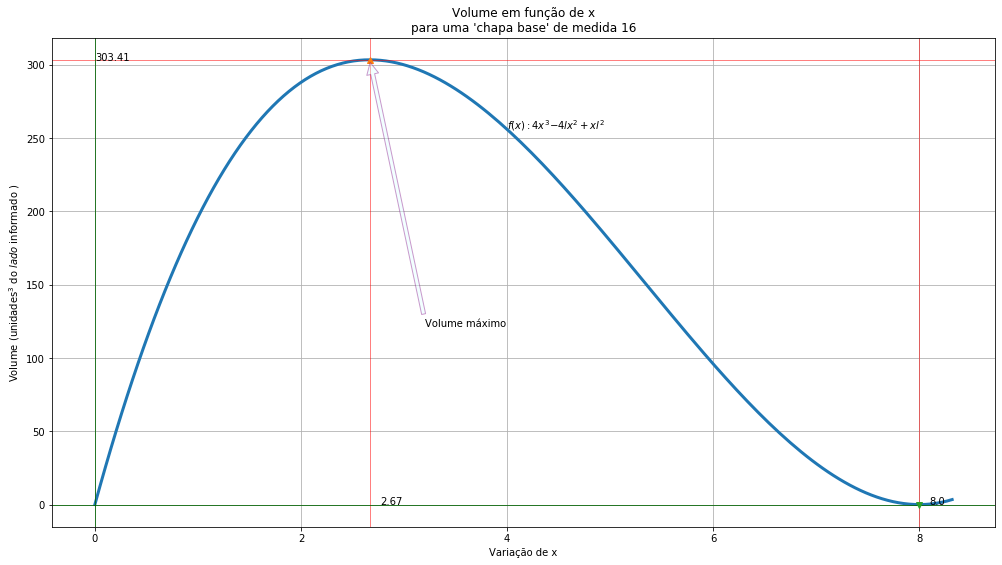

In [32]:
rcParams['figure.figsize'] = (16.9, 9.0)
# é apenas a resolucçao de ptos plotados na linha do grafico
#                                |
# a partir de 2x > l             |
# (ou x >  l/2)                  |         
# o fundo do cubo                |
# tem area zero(e                |
# portanto volume zero)          |
# portanto plotamos até          |
# pouco mais da                  |
# metade de l______________      |
#                         |      |
#                         |      |
# menor x possivel        |      |
# para q não fique        |      |
# uma aba de_______       |      |
# tamanho zero    |       |      |
#                 V       V      V
X = np.linspace(  0, lado*0.52, lado*10)
Y = [fVolume.subs(l,lado).subs(x,valores) for valores in X ] 
plt.plot(X, Y , lw=3, ms=12, mec='b', mew=3 ,)

plt.title("Volume em função de x\npara uma \'chapa base\' de medida "+str(lado))
plt.xlabel("Variação de x")
plt.ylabel("Volume (unidades$^3$ do $lado$ informado )")

plt.grid(True)
plt.axhline(y=maximoVolume, lw=0.5, c="red")
#plt.hlines(maximoVolume)
plt.axvline(x=maxVolume_x, lw=0.5, c="red")
plt.axvline(x=minVolume_x, lw=0.5, c="red")
plt.axhline(y=0, lw=0.8, c="darkgreen")
plt.axvline(x=0, lw=0.8, c="darkgreen")


plt.plot(maxVolume_x, fVolume.subs(l,lado).subs(x,maxVolume_x), marker="^")
plt.plot(minVolume_x, fVolume.subs(l,lado).subs(x,minVolume_x), marker="v")

plt.text(ptosCriticos[0]+0.1, 0.1, (  round(ptosCriticos[0], 2)))
plt.text(ptosCriticos[1]+0.1, 0.1, (  round(ptosCriticos[1], 2)))
plt.text(0, round(fVolume.subs(l,lado).subs(x,maxVolume_x) ), round(fVolume.subs(l,lado).subs(x,maxVolume_x), 2))

plt.annotate('Volume máximo', xy=(maxVolume_x, maximoVolume), xytext=(maxVolume_x*1.2, maximoVolume*0.4),
            arrowprops=dict(facecolor='lightcyan', ec='purple', alpha=0.4, shrink=0.01)
            )

plt.text(lado*0.25,fVolume.subs(l,lado).subs(x,lado*0.25), r'$ f(x):4x^3−4lx^2+xl^2 $')
plt.plot()
plt.show()

In [33]:
def plot_box(l, x, a = 0, g = 60):
    # height of box base from polig5
    Z = np.sin(np.radians(g))*x+a #box walls height from box base
    prj = np.cos(np.radians(g))*x #ground projection
    bb  = l-2*x
    
    if 2*x >= l:
        x = l/2
    
    bet = [x,      x+bb,   a]
    bdt = [bet[1], bet[1], a]
    bdf = [bet[1], x,      a]
    bef = [x,      x,      a]
    
    ute = [bet[0],     bet[1]+prj, Z]
    utd = [bdt[0],     ute[1],     Z]
    udt = [bdt[0]+prj, bdt[1],     Z]
    udf = [udt[0],     bdf[1],     Z]
    ufd = [bdf[0],     bdf[1]-prj, Z]
    ufe = [bet[0],     ufd[1],     Z]
    uef = [bef[0]-prj, bef[1],     Z]
    uet = [uef[0],     bet[1],     Z]
    
    polgn0 = [bet, bdt, bdf, bef]
    polgn1 = [ute, utd, bdt, bet]
    polgn2 = [bdt, udt, udf, bdf]
    polgn3 = [bef, bdf, ufd, ufe]
    polgn4 = [uet, bet, bef, uef]
    
    polgn5 = [[0,0,0],[0, l, 0], [l, l, 0], [l, 0, 0]]
    
    poligons=[polgn0, polgn1, polgn2, polgn3, polgn4, polgn5]
    
    #ax = a3(plt.figure())

    for poligon in poligons:
        tri = Poly3DCollection([poligon])
        tri.set_edgecolor('k')
        tri.set_alpha(0.9)
        tri.set_facecolor('brown')
        ax.add_collection3d(tri)
    
    ax.plot([x,x],        [0, l],       zs=[0, 0], color='k', linestyle='dashed')
    ax.plot([bb+x, bb+x], [0, l],       zs=[0, 0], color='k', linestyle='dashed')
    ax.plot([0, l],       [bb+x, bb+x], zs=[0, 0], color='k', linestyle='dashed')
    ax.plot([0, l],       [x, x],       zs=[0, 0], color='k', linestyle='dashed')
    
    
    ax.set_zlim3d(0, a+x)
    ax.set_ylim3d(0, l)
    ax.set_xlim3d(0, l)
    # Hide grid lines
    #ax.grid(False)

    # Hide axes ticks
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])

    
    #plt.axis('off')



<IPython.core.display.Javascript object>


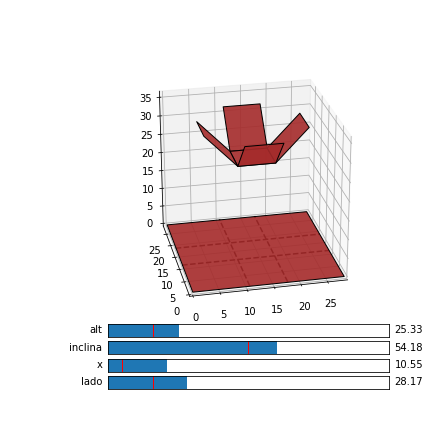

In [36]:

from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook
rcParams['figure.figsize'] = (6.0, 6.0)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

#fig, ax = plt.subplots(projection='3d')

plt.subplots_adjust(left=0.25, bottom=0.25)

box = plot_box#(lado, maxVolume_x, 0 , 0)
ax.margins(x=0)

axlado  = plt.axes([0.25, 0.1, 0.65, 0.03])
axlc    = plt.axes([0.25, 0.14, 0.65, 0.03])
axinc   = plt.axes([0.25, 0.18, 0.65, 0.03])
axalt   = plt.axes([0.25, 0.22, 0.65, 0.03])


slado   = Slider(axlado, 'lado',    0.1, 100,                  lado       )
slc     = Slider(axlc,   'x',       0.1, slado.valmax/2 - 0.1, maxVolume_x)
sinclin = Slider(axinc,  'inclina', 0.1, 90.0,                 45         )
salt    = Slider(axalt,  'alt',     0.1, 100,                 lado       )


def update(val):
    lado = slado.val
    x = slc.val
    inclin = sinclin.val
    alt = salt.val
    ax.clear()
    slc.valmax = slado.val/2
    box(lado, x, alt, g = inclin)
    fig.canvas.draw_idle()

slado.on_changed(update)
slc.on_changed(update)
sinclin.on_changed(update)
salt.on_changed(update)
plt.show();